<a href="https://colab.research.google.com/github/Josmy98/DS-RECORD/blob/main/Human_Stress_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import nltk
nltk.download('stopwords')
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('Stress.csv')

In [ ]:
df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


In [ ]:
df.shape

(2838, 7)

In [ ]:
print(df.isnull().sum())

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64


In [ ]:
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [ ]:
def clean(text):
    text = str(text).lower()
    text =re.sub('\[.*?\]', '', text)
    text =re.sub('https?://\$+|www\.\$+', '', text)
    text =re.sub('<.*?>+', '', text)
    text =re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text =re.sub('\n', '', text)
    text =re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)


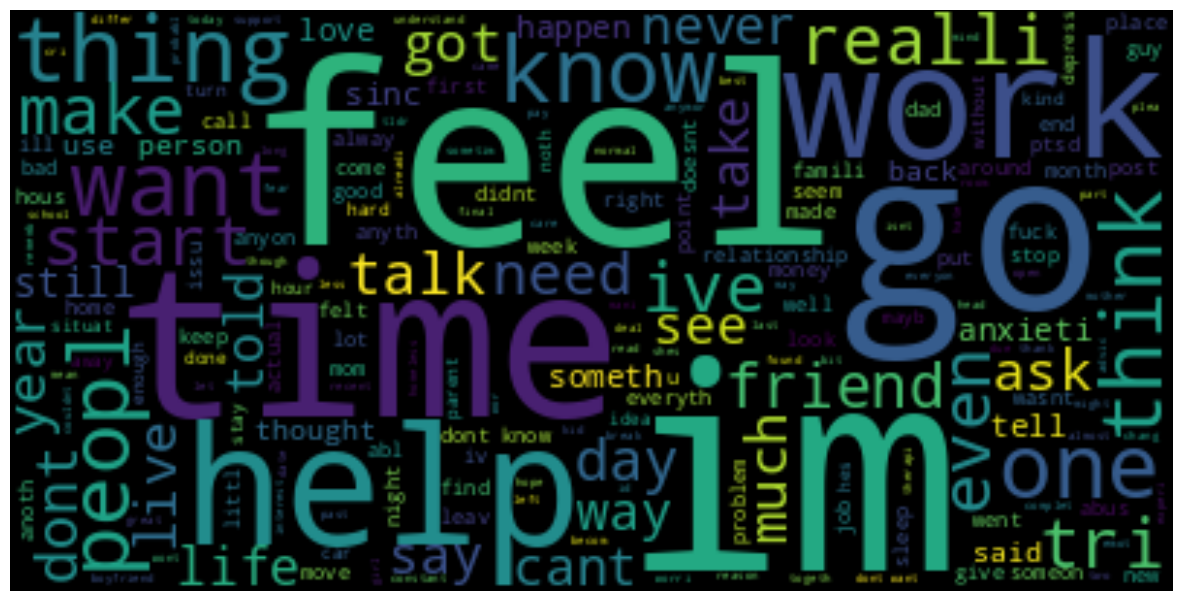

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords =set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df["label"] = df["label"].map({0: "No Stress", 1:"Stress"})
df = df[["text", "label"]]
print(df.head())


                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [ ]:
x = np.array(df["text"])
y = np.array(df["label"])
cv = CountVectorizer()
X =cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=42)


In [ ]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.721830985915493


In [ ]:
user = input("Enter a Text: ")
df = cv.transform([user]).toarray()
output = model.predict(df)
print(output)

Enter a Text: "I'm really stressed about this deadline! It's so overwhelming!"
['No Stress']
